In [1]:
import os
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import h5py

In [5]:
dir = "../data"
data_files = os.listdir(dir)
data_files = [s for s in data_files if "out_" in s and "h5" in s and "case_two" not in s and "simd" not in s]
data_files

['out_8.h5', 'out_16.h5', 'out_2.h5', 'out_1.h5', 'out_4.h5']

In [6]:
h5_files = [h5py.File(dir + '/' + f) for f in data_files]
solns = [f["population"] for f in h5_files]

In [7]:
distances = np.zeros((len(solns), len(solns)), dtype="float")
for i in range(distances.shape[0]):
    for j in range(distances.shape[1]):
        sol1_vec = solns[i][()].reshape((solns[i].size, 1))
        sol2_vec = solns[j][()].reshape((solns[j].size, 1))
        distances[i, j] = la.norm(sol1_vec - sol2_vec) / solns[i].size

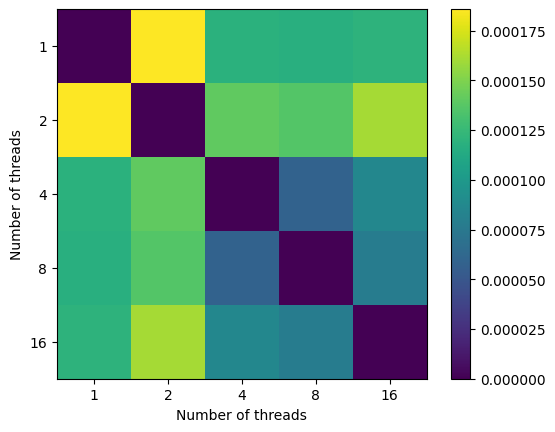

In [10]:
fig, ax = plt.subplots()
mappable = ax.imshow(distances)
plt.colorbar(mappable)
ax.set_xticks(range(5))
ax.set_xticklabels(['1', '2', '4', '8', '16'])
ax.set_yticks(range(5))
ax.set_yticklabels(['1', '2', '4', '8', '16'])
ax.set_xlabel("Number of threads")
ax.set_ylabel("Number of threads")
plt.savefig("../plots/verification_nodes_case1.png")